# Lab 3: Facial Cleanser Analysis

(Last update: 07/12/2023)

Full name: Nguyễn Thị Minh Minh\
Student ID: 21127528

---

## 1. Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# TODO (OPTION): import your libraries
import re

## 2. Data collection

- I have done that for you. In this assignment, you are going to analyze a dataset collected from **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. You are provided the following files:
    - `./survey.csv`: Survey results of more than 300 people taking part in the survey on GoogleForm. You will mainly work on this file.
    - `./survey.xlsx`: The content is similar to `./survey.csv` but you can open it in Excel to have a better view.
    - `./form.pdf`: Questionnaire survey.

- Read `./form.pdf` and summarize the survey by indicating **sections** in the form as well as **possible scenarios** when conducting the survey.

    **TODO**:
- Sections in the form:
    - Demographic: sex and location
    - Behaviour: How do you use facial cleanser ?
    - Behaviour: Which type of facial cleansers do you like ?
    - Shopping behaviour on facial cleansers.
    - Rating affect degree on the decision of buying a product.
    - Asking for personal opinion.
- Possible scenarios:
    - If participants' age range from 18 to 25 years old and they live in Ho Chi Minh City, participants, next will be asked whether they've used facial cleansers or not.
        - If participants have not used facial cleansers yet, they would be asked for the reason, then skip this scenario.
        - If participants have used facial cleansers, they would come into the section to collect data.
    - If participants' age are below < 18 or above 25, this scenario will be skipped.
    - If participants don't live in Ho Chi Minh City, this scenario will be skipped.

- Data source: Võ Thị Minh Trà, University of Economics Ho Chi Minh City.

## 3. Data pre-processing and exploration

- In this section, you are going to explore features of data. First, you have to read the data from `./survey.csv` and store it into a dataframe called `survey_df`.

In [2]:
# TODO: read data from ./survey.csv and save to survey_df then display 5 first lines of data
# raise NotImplementedError()
survey_df = pd.read_csv('./data/survey.csv')
survey_df.head()

,Dấu thời gian,Bạn bao nhiêu tuổi?,Hiện tại bạn đang cư trú ở đâu?,Bạn đã sử dụng sữa rửa mặt bao giờ chưa?,Nguyên nhân bạn chưa sử dụng sữa rửa mặt là gì?,Giới tính của bạn là?,1. Bạn sử dụng sữa rửa mặt với mục đích gì?,2. Da của bạn thuộc loại da gì?,3. Bạn thường sử dụng sữa rửa mặt bao nhiêu lần một ngày?,4. Bạn sử dụng sữa rửa mặt khi nào?,...,20. Bạn lo ngại điều gì khi sử dụng sữa rửa mặt?,"21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nb, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Chất lượng]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thương hiệu]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Giá cả]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mẫu mã]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Xuất xứ]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thành phần]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mùi hương]","22. Nếu chúng tôi ra mắt một sản phẩm sữa rửa mặt mới, bạn có sẵn sàng dùng thử hay không?",23. Bạn mong muốn điều gì nhất ở một sản phẩm sữa rửa mặt mới?
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


### 3.0. How many rows/columns are there in the dataset?

- Save the number of rows and columns to `n_rows, n_cols`

In [3]:
# TODO: save your answer to n_rows, n_cols
# raise NotImplementedError()
n_rows = survey_df.shape[0]
n_cols = survey_df.shape[1]

n_rows, n_cols

(337, 38)

In [4]:
# TEST
assert (n_rows, n_cols) == (337, 38)

### 3.1. Explore rows

- Each row is a result, which is done by the person taking part in the survey. These people conducted the survey on GoogleForm. The results are then saved to a sheet and converted to `*.csv` and `*.xlsx`

- Is there any duplicate row? You will check it using `Pandas`.

In [5]:
# TODO: save your answer to is_duplicate
# raise NotImplementedError()
is_duplicate = survey_df.duplicated()
if is_duplicate.any() == True:
    is_duplicate = True
else:
    is_duplicate = False
is_duplicate

False

In [6]:
# TEST
assert is_duplicate == False

### 3.2. Explore columns

- Observe the data provided, carefully read the column titles as well as the data contained in the columns, and compare them with the survey questionnaire to gain knowledge about the data.
- Since the column titles are too long, we have to re-name them in order to work on them easily.

In [7]:
# TODO: rename the columns. new names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
# raise NotImplementedError()
new_names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
renames = dict(zip(survey_df.columns, new_names))
survey_df.rename(columns = renames, inplace = True)
survey_df.head()

,Thời_gian,Tuổi,Địa_chỉ,Đã_dùng_srm?,Lý_do_chưa_sd,Giới_tính,1_Mục_đích_sd_srm,2_Loại_da,3_Tuần_suất_1ngày,4_Sd_khi_nào,...,20_Lo_ngại_về_srm,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương,22_Dùng_thử?,23_Kỳ_vọng
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


In [8]:
# TEST
assert (survey_df.columns == ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]).all()

### 3.3. Remove meaningless rows and columns

- Once again, this is **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. That means those people who do not live in HCM City or those whose age is not in the range of [18-25] will be removed.
- After removing these people, column `Tuổi` and `Địa_chỉ` become meaningless since they contain the same data. Therefore, we also remove these columns.

In [9]:
# TODO: remove those whose age is not within the range [18-25] and whose address is not HCM City
# TODO: then, remove 2 corresponding columns
# raise NotImplementedError()

regex_age = r'18 - 25'
regex_addr = r'TP.HCM'

mask_age = survey_df['Tuổi'].str.contains(regex_age)
mask_addr = survey_df['Địa_chỉ'].str.contains(regex_addr)

mask_age = mask_age.fillna(False)
mask_addr = mask_addr.fillna(False)
mask = mask_age & mask_addr

survey_df = survey_df[mask]
survey_df.reset_index(drop = True, inplace = True)
survey_df.drop(["Tuổi", "Địa_chỉ"], axis = 1, inplace = True)
survey_df.head()

,Thời_gian,Đã_dùng_srm?,Lý_do_chưa_sd,Giới_tính,1_Mục_đích_sd_srm,2_Loại_da,3_Tuần_suất_1ngày,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,...,20_Lo_ngại_về_srm,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương,22_Dùng_thử?,23_Kỳ_vọng
0,04/02/2023 20:10:08,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,"Các sàn thương mại điện tử, Nhà thuốc","Truyền thông; quảng cáo, Tự tìm hiểu, Bạn bè",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,"Các sàn thương mại điện tử, Cửa hàng của hãng,...","Truyền thông; quảng cáo, Tự tìm hiểu, Bạn bè",...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",Các cửa hàng mỹ phẩm,"Tự tìm hiểu, Bạn bè",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",Siêu thị; trung tâm thương mại,Tự tìm hiểu,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ","Các sàn thương mại điện tử, Website của hãng","Truyền thông; quảng cáo, Tư vấn từ bác sĩ, Gia...",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


In [10]:
# TEST
assert survey_df.shape == (309, 36)
assert set(['Tuổi', 'Địa_chỉ']).intersection(set(survey_df.columns)) == set()

- The survey participants must be those who use facial cleanser. That means those who have not used cleanser are meaningless to the survey. You have to remove these people from the data.

- After removing these people, column `Đã_dùng_srm` and column `Lý_do_chưa_sd` become meaningless since thay contain the same data. Therefore, we also remove these columns.

In [11]:
# TODO: remove those who have not used facial cleanser
# TODO: then, remove 2 corresponding columns
# raise NotImplementedError()

survey_df.drop(survey_df[survey_df["Đã_dùng_srm?"] == "Chưa từng"].index, inplace = True)
survey_df.drop(["Đã_dùng_srm?", "Lý_do_chưa_sd"], axis = 1, inplace = True)

In [12]:
# TEST
assert survey_df.shape == (305, 34)
assert set(['Đã_dùng_srm?', 'Lý_do_chưa_sd']).intersection(set(survey_df.columns)) == set()

### 3.4. Handle missing data & Convert data

- Next, we start handling missing data. Run function `info()` so you can overview your data.

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 308
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         305 non-null    object 
 1   Giới_tính                         305 non-null    object 
 2   1_Mục_đích_sd_srm                 305 non-null    object 
 3   2_Loại_da                         305 non-null    object 
 4   3_Tuần_suất_1ngày                 305 non-null    object 
 5   4_Sd_khi_nào                      305 non-null    object 
 6   5_Mua_ở_đâu                       305 non-null    object 
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 8   7_Chiết_xuất                      305 non-null    object 
 9   8_Srm_đang_sd                     305 non-null    object 
 10  9_Srm_có_mùi_hương?               305 non-null    object 
 11  91_Thích_hương_trái_cây?          166 non-null    object 
 12  92_Thích

- You can see that, most of the columns do not have missing data except columns `91_Thích_hương_trái_cây?`, `92_Thích_hương_rau_củ?` and `93_Thích_hương_hoa_cỏ?`. They are missing nearly 50% number of rows.

- State the reason. Then, conclude whether we should handle missing data. If you decided to handle missing data, how would you do that?

    **TODO**:
- Some reason that those columns having so many missing values:
    - Participant missed the questions.
    - Participant don't want to express their opinions on these questions.
    - The listed answers is not available and participants are not willing to type in their own tastes.
- To handle missing data, due to the core characteristics of these types of data is category type so we can use method to fulfill like `mean` or `median`.
    - In this situation, I propose the first method is to keep it the same. Although, there exists some missing values from the 3 columns but it still got huge impact on other features. Furthermore, these features based on personal opinion, we can't just fill in random values, which probably leads to trash data having no practical value in evaluating.
    - The second method taking into consideration I think that should be data recollection. However, it is also quite complicated becaused of time and expense fee.

- Observe the result returned by `info()`, you are able to gain some information about columns. From there, you will convert:
    - `Thời_gian`: `Datetime`
    - Columns `21_*` (columns which start with `21_`): `Int`. The reason is that these columns contain number from 1 (`Rất không ảnh hưởng`) to 7 (`Rất ảnh hưởng`). You can use `for` loop here in order to loop through the columns and convert them.

- State the reason why the data type of columns `21_*` is `np.float64` instead of `np.int64` (before conversion).

    **TODO**: Because in the raw data read from csv, data type of columns `21_*` in the form of floating point like 1.0, 2.0,... Therefore, when reading the data into dataframe, the data type would be `np.float64` instead of `np.int64`.

In [14]:
# TODO: convert column `Thời_gian` to datetime and columns `21_*` to int
# raise NotImplementedError()

survey_df['Thời_gian'] = pd.to_datetime(survey_df['Thời_gian'], format='%d/%m/%Y %H:%M:%S')
for column in survey_df.columns:
    if column.startswith('21_'):
        survey_df[column] = survey_df[column].astype('int64')

In [15]:
# TEST
assert survey_df['Thời_gian'].dt.day.max() == 12
assert (survey_df.dtypes[1:] == [object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, object, object]).all()

### 3.5. Data distribution in columns

- In this section, you are going to extract the distribution of data in each column.Specifically, there are 2 types of columns: **Categorical** and **Numeric**. For each type, there are different ways to extract the distribution.
- First, we will work on numeric columns. You will perform 2 steps:
    - Step #1: Determine the quantile values **(min, 25%, 50%, 75%, max)**: Save your answer to `numeric_col_profile`. This variable is a dataframe whose index column is `["min", "25%", "50%", "75%", "max"]` and column names are similar to the name of numeric columns.
    - Step #2: Draw a histogram to visualize the distribution.

In [16]:
# TODO: compute quantile values of numeric columns ("21_*" columns)
# raise NotImplementedError()

calculated_columns = survey_df[survey_df.columns[survey_df.columns.str.startswith("21_")]]
val_min = calculated_columns.min()
val_25 = calculated_columns.quantile(0.25)
val_50 = calculated_columns.quantile(0.5)
val_75 = calculated_columns.quantile(0.75)
val_max = calculated_columns.max()

numeric_col_profile = pd.DataFrame({
    'min': val_min.values,
    '25%': val_25.values,
    '50%': val_50.values,
    '75%': val_75.values,
    'max': val_max.values
}, index=calculated_columns.columns)
numeric_col_profile = numeric_col_profile.transpose()

numeric_col_profile

,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.0,4.0,4.0,3.0,4.0,5.0,3.0
50%,7.0,5.0,5.0,4.0,5.0,6.0,5.0
75%,7.0,6.0,6.0,5.0,6.0,7.0,6.0
max,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [17]:
# TEST
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_chất_lượng'])  == {'min': 1.0, '25%': 5.0, '50%': 7.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thương_hiệu'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_giá_cả'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mẫu_mã'])  == {'min': 1.0, '25%': 3.0, '50%': 4.0, '75%': 5.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_xuất_xứ'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thành_phần'])  == {'min': 1.0, '25%': 5.0, '50%': 6.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mùi_hương'])  == {'min': 1.0, '25%': 3.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}

- In step #2, you will draw data distributions in order to understand more about numeric columns. You will draw all distributions in one figure (all charts should share the same y-axis). Note that you have to choose the number of `bins`. Propose a number of `bins` and explain why.

    **TODO**:
- The number of bins I propose is `7`.
- Reason: because on the rating score, the range of its is from point 1 to point 7. Therefore, each bin would represent for each point.

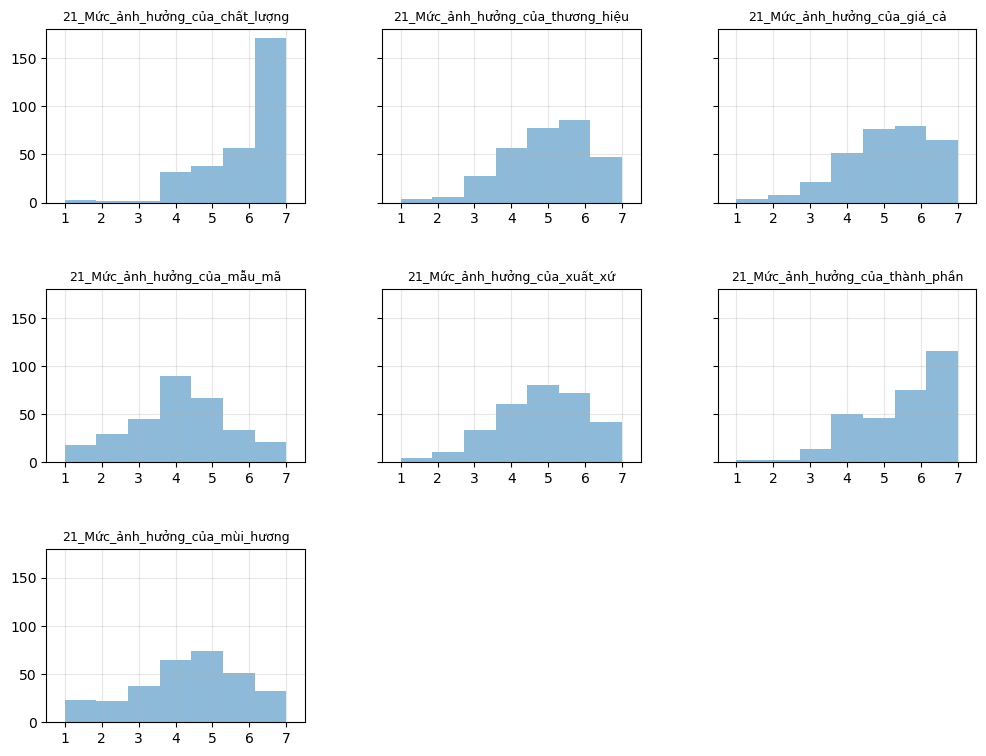

In [18]:
# TODO: draw 7 histogram
# raise NotImplementedError()
fig, axs = plt.subplots(3,3, figsize = (12,9), sharey = True)
axs = axs.flatten()

axs[0].hist(survey_df['21_Mức_ảnh_hưởng_của_chất_lượng'], bins = 7, alpha = 0.5)
axs[1].hist(survey_df['21_Mức_ảnh_hưởng_của_thương_hiệu'], bins = 7, alpha = 0.5)
axs[2].hist(survey_df['21_Mức_ảnh_hưởng_của_giá_cả'], bins = 7, alpha = 0.5)
axs[3].hist(survey_df['21_Mức_ảnh_hưởng_của_mẫu_mã'], bins = 7, alpha = 0.5)
axs[4].hist(survey_df['21_Mức_ảnh_hưởng_của_xuất_xứ'], bins = 7, alpha = 0.5)
axs[5].hist(survey_df['21_Mức_ảnh_hưởng_của_thành_phần'], bins = 7, alpha = 0.5)
axs[6].hist(survey_df['21_Mức_ảnh_hưởng_của_mùi_hương'], bins = 7, alpha = 0.5)

axs[7].axis('off')
axs[8].axis('off')

# set title
axs[0].set_title('21_Mức_ảnh_hưởng_của_chất_lượng', fontsize = 9)
axs[1].set_title('21_Mức_ảnh_hưởng_của_thương_hiệu', fontsize = 9)
axs[2].set_title('21_Mức_ảnh_hưởng_của_giá_cả', fontsize = 9)
axs[3].set_title('21_Mức_ảnh_hưởng_của_mẫu_mã', fontsize = 9)
axs[4].set_title('21_Mức_ảnh_hưởng_của_xuất_xứ', fontsize = 9)
axs[5].set_title('21_Mức_ảnh_hưởng_của_thành_phần', fontsize = 9)
axs[6].set_title('21_Mức_ảnh_hưởng_của_mùi_hương', fontsize = 9)

plt.setp(axs, xticks=np.arange(1, 8, step=1), xlim=(0.5,7.5), ylim=[0,180])

# set grid
axs[0].grid(True, alpha = 0.3)
axs[1].grid(True, alpha = 0.3)
axs[2].grid(True, alpha = 0.3)
axs[3].grid(True, alpha = 0.3)
axs[4].grid(True, alpha = 0.3)
axs[5].grid(True, alpha = 0.3)
axs[6].grid(True, alpha = 0.3)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


- According to the above distributions, what factors do the survey participants care about when buying facial cleanser? Why?

    **TODO**:
- Factors, survey participants care about when buying facial cleansers:
    - The very first factor would be quality `Mức ảnh hưởng của chất lượng`. Observing the first illustration, we could see that the number of participants rate for `quality` of score range 7 is more than half of the total participants with going around 155 people. The overal figure skews on the right side, score ranging from 4 to 7, so people would take this criteria as the first priority.
    - The second important factor is `Mức ảnh hưởng của thành phần`. This got the same look with the first figure, skewing on the right side with high rating score (5,6,7 point).
    - Besides that, 3 factors `Mức ảnh hưởng của thương hiệu`, `Mức ảnh hưởng của giá cả`, `Mức ảnh hưởng của xuất xứ` are also quite crucial in customers' consideration (around 5 and 6 point). As these are the root and proof for the quality of a product.

- This is a crucial insight since it offered data that may be used to plan marketing campaigns or the development of new product manufacturing plans.

- After handling numeric columns, you will handle categorical columns. Note that there are 2 type of survey questions:
    - Multiple choice, single answer: In this lab, it is not required to pre-process these columns.
    - Multiple choice, multiple answer: Have to pre-process.

- Here, you will work on the first one. You will perform these following steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding.
        - For example: In `Giới_tính`, we have the number of different attributes is 2 (`Nam` and `Nữ`). The dictionary is `{"Nữ": 244, "Nam": 61}` since there are 244 female participants and 61 male participants.
        - Save your result to a dataframe called `single_cate_profile`. The index column of dataframe is `["num_diff_vals", "distribution"]` and column names are similar to the name of categorical columns.
    - Step #2: Visualize the distribution using pie chart. You can use `for` loop to draw the charts.

In [19]:
single_answer_cols = ['Giới_tính', '2_Loại_da', '3_Tuần_suất_1ngày', '7_Chiết_xuất', '8_Srm_đang_sd', '9_Srm_có_mùi_hương?', '10_Dung_tích', '11_Số_lượng_mua', '12_Chi_tiền_cho_150ml', '13_Tiêu_chí_chọn_srm', '14_Ai_tư_vấn', '18_Tiêu_chí_mua_offline', '19_Tiêu_chí_mua_online', '22_Dùng_thử?', '23_Kỳ_vọng']
df = survey_df[single_answer_cols]

# TODO: code step 1
# raise NotImplementedError()
def calculate_distribution(column):
    return dict(column.value_counts())
    
distribution = {col: dict(df[col].value_counts()) for col in single_answer_cols} #list comprehension
num_diff_vals = df.nunique()

single_cate_profile = pd.DataFrame({
    'num_diff_vals': num_diff_vals,
    'distribution': distribution
})

single_cate_profile = single_cate_profile.transpose()
single_cate_profile



,Giới_tính,2_Loại_da,3_Tuần_suất_1ngày,7_Chiết_xuất,8_Srm_đang_sd,9_Srm_có_mùi_hương?,10_Dung_tích,11_Số_lượng_mua,12_Chi_tiền_cho_150ml,13_Tiêu_chí_chọn_srm,14_Ai_tư_vấn,18_Tiêu_chí_mua_offline,19_Tiêu_chí_mua_online,22_Dùng_thử?,23_Kỳ_vọng
num_diff_vals,2,6,4,2,4,2,4,3,4,6,5,5,5,3,5
distribution,"{'Nữ': 244, 'Nam': 61}","{'Da hỗn hợp': 98, 'Da dầu': 93, 'Da khô': 45,...","{'2 lần/ngày': 191, '1 lần/ngày': 76, 'Ít hơn ...","{'Chiết xuất từ các hoạt chất hóa học': 160, '...","{'Dạng gel': 199, 'Dạng bọt': 39, 'Dạng kem': ...","{'Có': 166, 'Không': 139}","{'Trên 150 ml - 300 ml': 168, '50 ml - 150 ml'...","{'Từ 1-2 sản phẩm/1 lần mua': 273, 'Từ 3-5 sản...","{'Từ 100.000 vnđ - 200.000 vnđ/150 ml': 203, '...","{'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 4...","{'Review từ KOL, beauty blogger, người nổi tiế...","{'Uy tín của cửa hàng': 157, 'Nguồn thông tin ...","{'Đánh giá từ những người đã mua': 144, 'Nguồn...","{'Chưa biết': 204, 'Có': 84, 'Không': 17}","{'Sản phẩm chuyên sâu với hiệu quả cao': 138, ..."


In [20]:
# TEST
assert dict(single_cate_profile['Giới_tính']) == {'num_diff_vals': 2, 'distribution': {'Nữ': 244, 'Nam': 61}}
assert dict(single_cate_profile['13_Tiêu_chí_chọn_srm']) == {'num_diff_vals': 6, 'distribution': {'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 44, 'Thể tích, dung tích': 9,'Mùi hương': 7,'Bao bì': 2}}

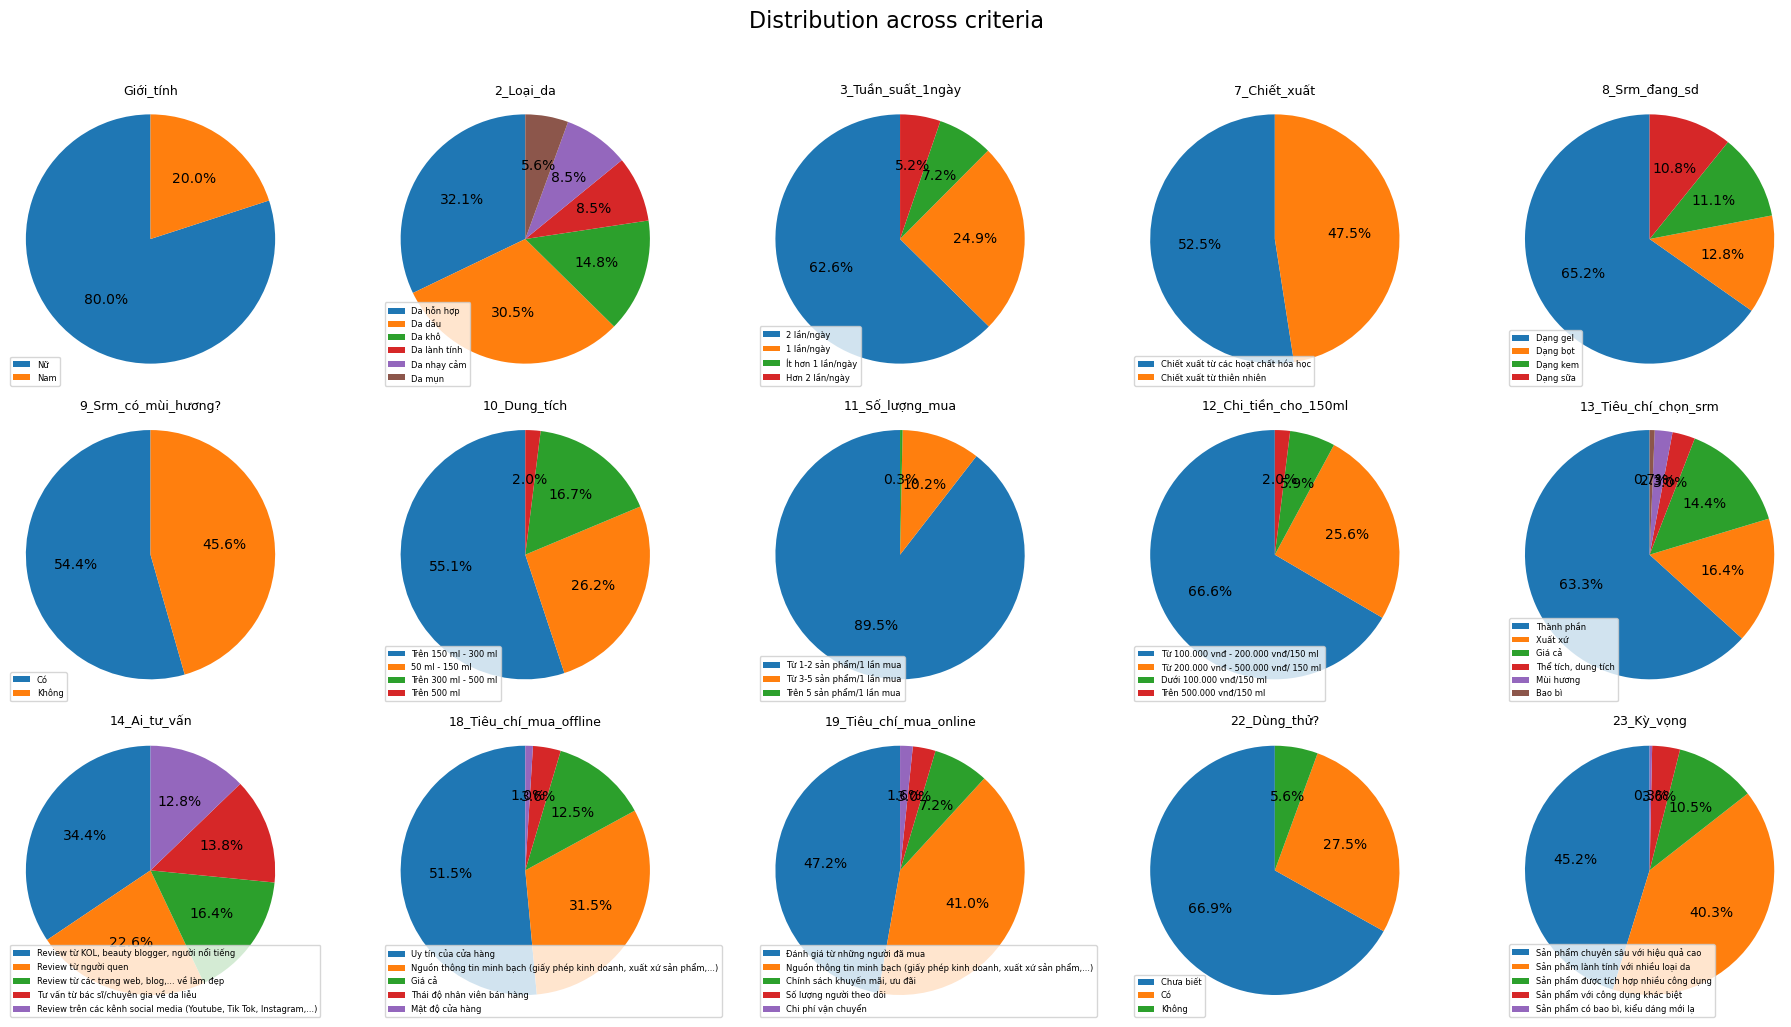

In [21]:
# TODO: code step 2
# raise NotImplementedError()
fig, axs = plt.subplots(3,5, figsize = (18,10))
axs = axs.flatten()


for i, column in enumerate(single_answer_cols):
    labels = list(single_cate_profile[column]['distribution'].keys())
    sizes = list(single_cate_profile[column]['distribution'].values())
    axs[i].pie(sizes, autopct='%1.1f%%', startangle=90, radius = 2.1, labels= None)
    axs[i].axis('equal')
    axs[i].set_title(column, fontsize = 9)
    axs[i].legend(labels, loc = 'lower left', bbox_to_anchor=(-0.05, -0.05), prop = {'size':6})
    
fig.suptitle("Distribution across criteria", fontsize=16, y=1.02)
plt.tight_layout()

- Look at the above charts, you can gain some information about the distribution of categorical columns with single answer. For example, you can easily point out that most of participants clean their face twice a day, buy the cleanser product according to the instructions of KOLs and beauty blogger,...
- This information will help you a lot in deciding what and how to buy a cleanser product.

- Next, we will compute the distribution of multiple answer columns. You also perform the following familiar steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding. Save your result to a dataframe called `multiple_cate_profile`. Note that in columns `'91_*', '92_*', '93_*'`, there are user-defined values, which are recorded from `Mục khác`. You have to replace these values with `Khác` (you can use `apply` for replacing). For example, column `91_Thích_hương_trái_cây?` has 8 original values (see `./form.pdf`). The rest values will be replace with `Khác`.
    - Step #2: Visualize the 5 values with the highest frequency of occurrence using bar chart. You can use `for` loop to draw the charts.

- Note that do not touch the `df` since it will be used to check your answer.

In [22]:
multi_answer_cols = ['1_Mục_đích_sd_srm','4_Sd_khi_nào','5_Mua_ở_đâu','6_Quảng_cáo_ở_đâu','91_Thích_hương_trái_cây?','92_Thích_hương_rau_củ?','93_Thích_hương_hoa_cỏ?','15_Xuất_xứ','16_Mua_online_ở_đâu','17_Mua_offline_ở_đâu','20_Lo_ngại_về_srm']
df = survey_df[multi_answer_cols]

# TODO: code step 1
# raise NotImplementedError()

list_91_answers = ['Dâu','Táo','Mâm xôi','Cherry','Việt quất','Đào','Cam','Chanh']
list_92_answers = ['Dưa leo','Thảo mộc','Nha đam','Rau má','Cà chua','Cần tây']
list_93_answers = ['Lavender','Hoa hồng','Anh đào','Trà xanh','Hoa sứ','Hoa cúc']

# Replace with 'Khác'
df = df.transform(lambda x: x.str.strip().str.strip(',').str.strip('?'))
df['91_Thích_hương_trái_cây?'] = df['91_Thích_hương_trái_cây?'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df['91_Thích_hương_trái_cây?'] = df['91_Thích_hương_trái_cây?'].apply(lambda x: [item if item in list_91_answers else 'Khác' for item in x] if isinstance(x, list) else x)
df['91_Thích_hương_trái_cây?'] = df['91_Thích_hương_trái_cây?'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

df['92_Thích_hương_rau_củ?'] = df['92_Thích_hương_rau_củ?'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df['92_Thích_hương_rau_củ?'] = df['92_Thích_hương_rau_củ?'].apply(lambda x: [item if item in list_92_answers else 'Khác' for item in x] if isinstance(x, list) else x)
df['92_Thích_hương_rau_củ?'] = df['92_Thích_hương_rau_củ?'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

df['93_Thích_hương_hoa_cỏ?'] = df['93_Thích_hương_hoa_cỏ?'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df['93_Thích_hương_hoa_cỏ?'] = df['93_Thích_hương_hoa_cỏ?'].apply(lambda x: [item if item in list_93_answers else 'Khác' for item in x] if isinstance(x, list) else x)
df['93_Thích_hương_hoa_cỏ?'] = df['93_Thích_hương_hoa_cỏ?'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

df_count_value = np.vectorize(lambda x: dict(df[x].str.split(', ').explode().value_counts()))(df.columns)
df_count = np.vectorize(lambda x: len(df_count_value[x]))(np.arange(len(df.columns)))

multiple_cate_profile = pd.DataFrame({
    'num_diff_vals': df_count,
    'distribution': df_count_value
})

#add column name
multiple_cate_profile = multiple_cate_profile.transpose()
multiple_cate_profile.columns = multi_answer_cols
multiple_cate_profile

,1_Mục_đích_sd_srm,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,91_Thích_hương_trái_cây?,92_Thích_hương_rau_củ?,93_Thích_hương_hoa_cỏ?,15_Xuất_xứ,16_Mua_online_ở_đâu,17_Mua_offline_ở_đâu,20_Lo_ngại_về_srm
num_diff_vals,7,5,9,8,9,7,7,11,3,6,4
distribution,{'Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...':...,"{'Trước khi đi ngủ': 242, 'Sau khi thức dậy': ...","{'Các sàn thương mại điện tử': 213, 'Các cửa h...","{'Truyền thông; quảng cáo': 205, 'Tự tìm hiểu'...","{'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36...","{'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47,...","{'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 6...","{'Hàn Quốc': 184, 'Nhật Bản': 111, 'Mỹ': 100, ...","{'Sàn thương mại điện tử': 253, 'Website của h...","{'Các cửa hàng mỹ phẩm': 198, 'Cửa hàng chính ...","{'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gâ..."


In [23]:
# TEST
assert list(multiple_cate_profile.to_numpy()[0]) == [7, 5, 9, 8, 9, 7, 7, 11, 3, 6, 4]
assert dict(multiple_cate_profile['20_Lo_ngại_về_srm']) == {'num_diff_vals': 4, 'distribution': {'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gây kích ứng; bong tróc da': 141, 'Sản phẩm không có nguồn gốc rõ ràng': 104, 'Không có hiệu quả hoặc hiệu quả kém': 44}}
assert dict(multiple_cate_profile['91_Thích_hương_trái_cây?']) == {'num_diff_vals': 9, 'distribution': {'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36, 'Chanh': 34, 'Dâu': 34, 'Việt quất': 33, 'Khác': 13, 'Mâm xôi': 11}}
assert dict(multiple_cate_profile['92_Thích_hương_rau_củ?']) == {'num_diff_vals': 7, 'distribution': {'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47, 'Dưa leo': 35, 'Cà chua': 20, 'Cần tây': 5, 'Khác': 4}}
assert dict(multiple_cate_profile['93_Thích_hương_hoa_cỏ?']) == {'num_diff_vals': 7, 'distribution': {'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 68, 'Anh đào': 49, 'Hoa cúc': 20, 'Hoa sứ': 7, 'Khác': 3}}

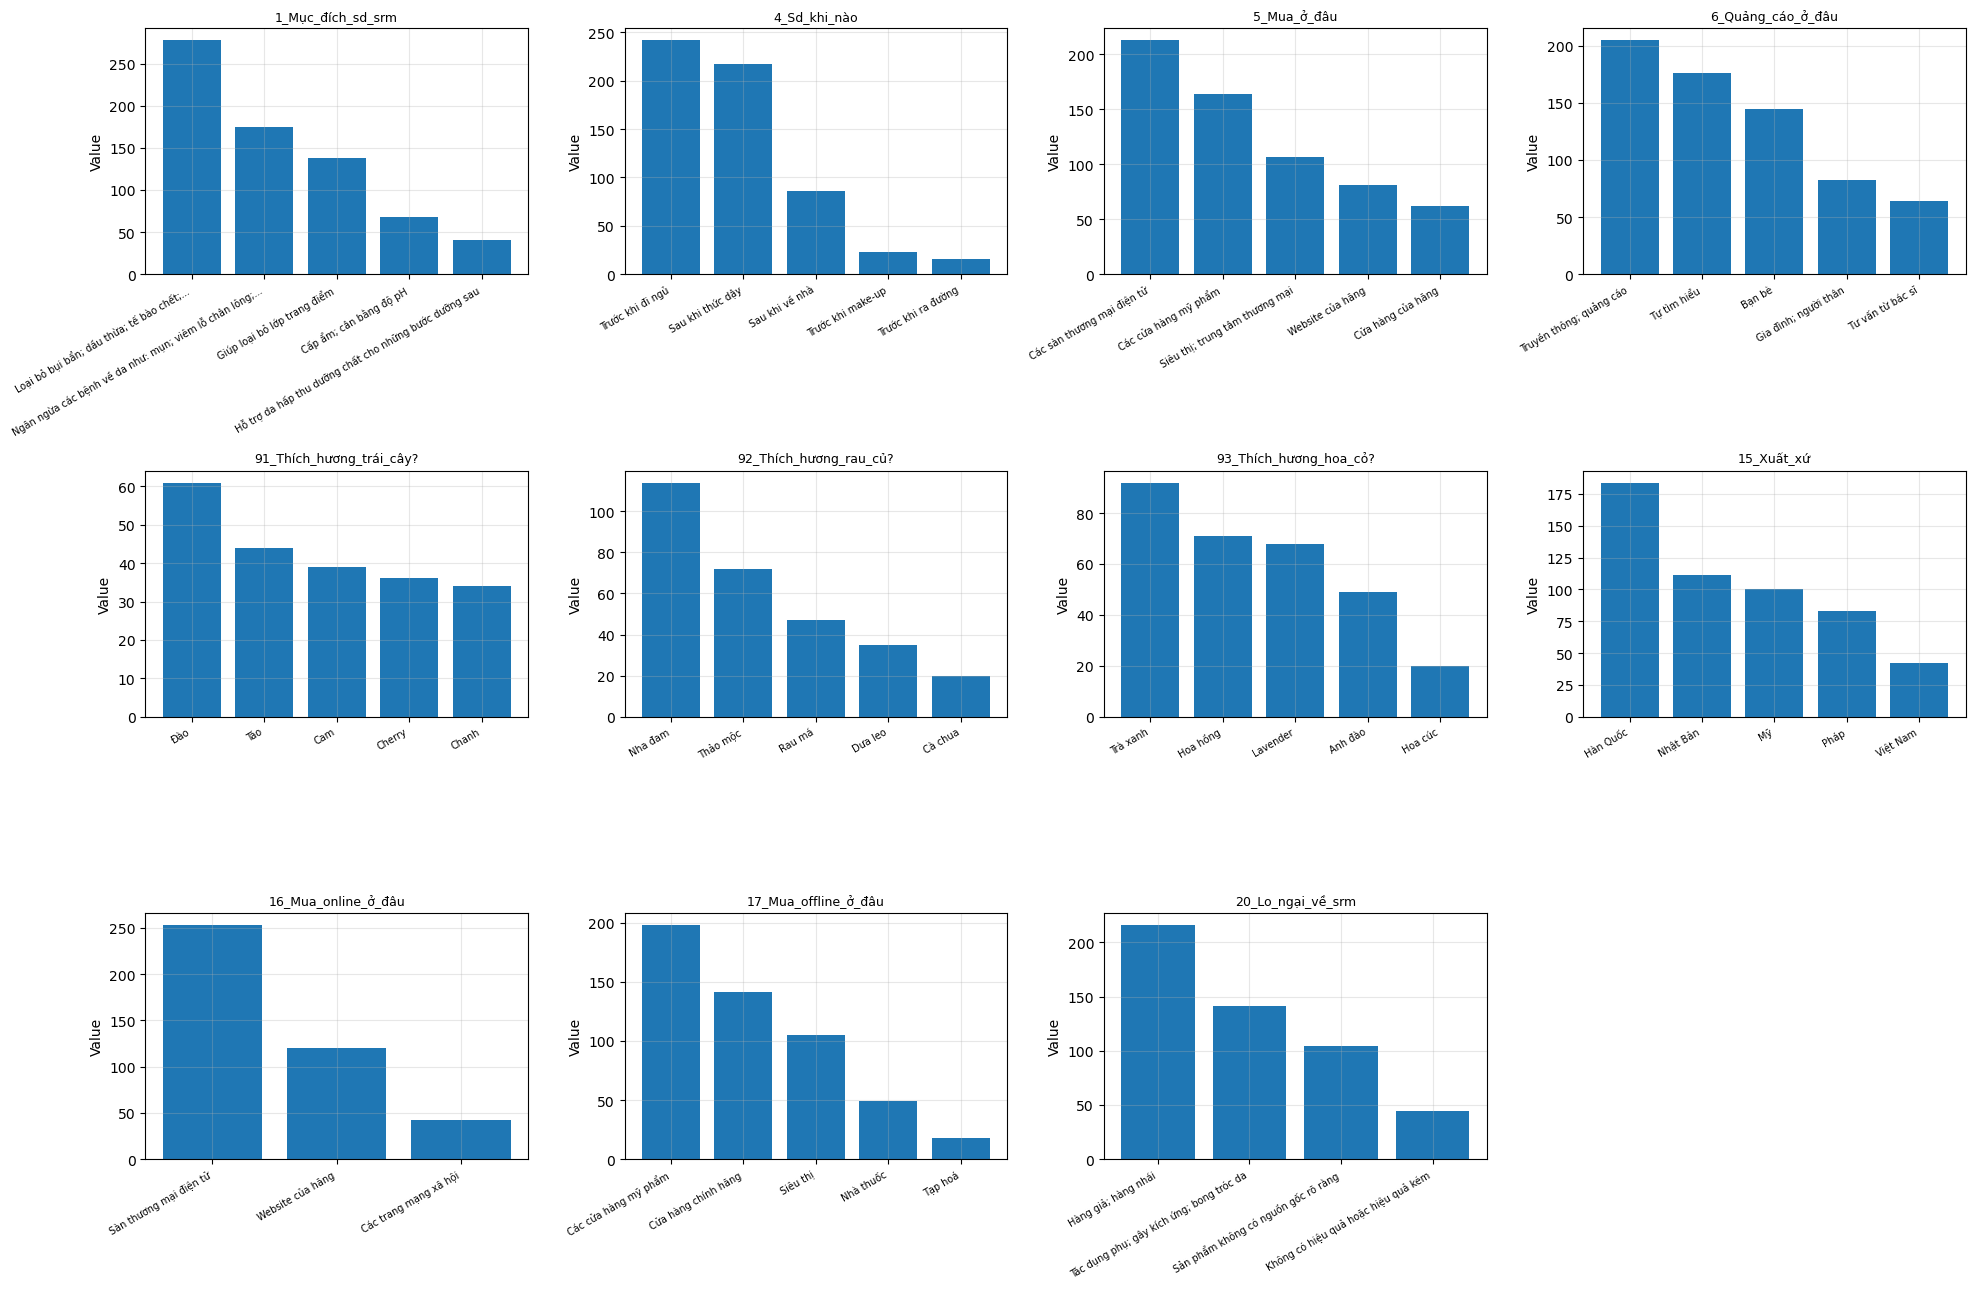

In [24]:
# TODO: code step 2
# raise NotImplementedError()

fig, axs = plt.subplots(3,4, figsize = (20,13))
axs = axs.flatten()

# choose 5 highest frequency of occurrence
for i, column in enumerate(multi_answer_cols):
    labels = list(multiple_cate_profile[column]['distribution'].keys())
    sizes = list(multiple_cate_profile[column]['distribution'].values())
    axs[i].bar(labels[:5], sizes[:5], align='center', ecolor='black')
    axs[i].set_title(column, fontsize = 9)
    axs[i].set_ylabel('Value')
    axs[i].grid(True, alpha = 0.3)
    axs[i].set_xticklabels(labels[:5], rotation = 30, ha="right", fontsize = 7)
axs[11].axis('off')
plt.tight_layout()

- Finally, you will perform **one-hot encoding** on categorical columns. One-hot encoding is a popular pre-processing method for categorical data. What is one-hot encoding? What does it use for?

    **TODO**:
- One-hot encoding is method of turning data in type of category into binary mark form; as it record the apprearance of each items in form of binary 0 and 1.
- One-hot encoding is usually used for pre-processing beforing coming to the stage of machine learning or feature analyzing.

- Since performing one-hot encoding on single answer columns is quite easy, you will perform this technique on multiple answer columns. In this part, you can use `for` loop to loop through the column and pre-process them. However, it would be better if you don't use loop for this task. The final dataframe is save to `one_hot_df`

- Note that do not touch the `df` since it will be used to check your answer.

In [25]:
# TODO: perform one-hot encoding on multiple_answer_cols
# raise NotImplementedError()

one_hot_df = pd.DataFrame()

for col in df.columns:
    col_feature = df[col].str.strip().str.split(', ').explode().str.strip()
    one_hot_cols = pd.get_dummies(col_feature, prefix=col, prefix_sep='_').groupby(level=0).sum()
    one_hot_df = pd.concat([one_hot_df, one_hot_cols], axis=1)
    
one_hot_df

,1_Mục_đích_sd_srm_Cấp ẩm; cân bằng độ pH,1_Mục_đích_sd_srm_Giúp loại bỏ lớp trang điểm,1_Mục_đích_sd_srm_Hỗ trợ da căng bóng,1_Mục_đích_sd_srm_Hỗ trợ da hấp thu dưỡng chất cho những bước dưỡng sau,1_Mục_đích_sd_srm_Hỗ trợ làm trắng da,1_Mục_đích_sd_srm_Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,1_Mục_đích_sd_srm_Ngăn ngừa các bệnh về da như: mụn; viêm lỗ chân lông;...,4_Sd_khi_nào_Sau khi thức dậy,4_Sd_khi_nào_Sau khi về nhà,4_Sd_khi_nào_Trước khi make-up,...,17_Mua_offline_ở_đâu_Các cửa hàng mỹ phẩm,17_Mua_offline_ở_đâu_Cửa hàng chính hãng,17_Mua_offline_ở_đâu_Cửa hàng tiện lợi,17_Mua_offline_ở_đâu_Nhà thuốc,17_Mua_offline_ở_đâu_Siêu thị,17_Mua_offline_ở_đâu_Tạp hoá,20_Lo_ngại_về_srm_Hàng giả; hàng nhái,20_Lo_ngại_về_srm_Không có hiệu quả hoặc hiệu quả kém,20_Lo_ngại_về_srm_Sản phẩm không có nguồn gốc rõ ràng,20_Lo_ngại_về_srm_Tác dụng phụ; gây kích ứng; bong tróc da
0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
305,0,0,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
306,1,0,1,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,1,0
307,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [26]:
# TEST
for i in range(len(df)):
    if i != 7 and i != 168:
        assert sum(one_hot_df.iloc[i]) == sum([len(item.split(', ')) if item is not np.nan else 0 for item in df.iloc[i]])

- What does the test mean? In the test, why don't I test the row #7 and #168?

    **TODO** (OPTIONAL):
- The purpose of the test is to verify whether the one-hot encoding dataframe generated from `df` dataframe and the original dataframe is correspondent with each other. .

## 4. Question proposing & Answering

- In this section, you are going to answer my 2 questions and prose 1 question. Note that these questions can all be answered by analyzing data. Theoretically, the proposed question have to benefit at a certain level. But this is exercise about `Pandas`, my questions can be aimed more at technical side than the meaningful side. But your question has to be meaningful :v

### 4.0. What is the difference in scent preference when choosing a facial cleanser between male and female participants?

- In order to answer this question, You have to compare the choice of scent between male and female participants. Group bar chart might be a good option to do so.
- First, you have to filter needed columns (`'91_*', '92_*', '93_*'`) from `one_hot_df` and place them in a new dataframe call `scent_df`. You can use `for` loop to get the column names if needed.
- Then, group by `Giới_tính` to find out the distribution of scent for each gender. Save the result to `distribution_91, distribution_92, distribution_93`. You can observe the `distribution_91` in the cell code below.
- Visualize the result in a group bar chart. Groups are scents. In each group, there will be 2 columns (`Nam` and `Nữ`)

In [27]:
# TODO: answer the question
# raise NotImplementedError()
scent_df = one_hot_df.filter(regex = r'(91|92|93)_*')
scent_df = pd.concat([scent_df, survey_df['Giới_tính']], axis = 1)

distribution_91 = scent_df.groupby('Giới_tính').sum().iloc[:, :9]
distribution_92 = scent_df.groupby('Giới_tính').sum().iloc[:,9:16]
distribution_93 = scent_df.groupby('Giới_tính').sum().iloc[:, 16:]


distribution_91

,91_Thích_hương_trái_cây?_Cam,91_Thích_hương_trái_cây?_Chanh,91_Thích_hương_trái_cây?_Cherry,91_Thích_hương_trái_cây?_Dâu,91_Thích_hương_trái_cây?_Khác,91_Thích_hương_trái_cây?_Mâm xôi,91_Thích_hương_trái_cây?_Táo,91_Thích_hương_trái_cây?_Việt quất,91_Thích_hương_trái_cây?_Đào
Giới_tính,,,,,,,,,
Nam,9,10,8,6,2,2,11,12,12
Nữ,30,24,28,28,11,9,33,21,49


In [28]:
# TEST
assert dict(distribution_91['91_Thích_hương_trái_cây?_Việt quất']) == {'Nam': 12, 'Nữ': 21}
assert dict(distribution_92['92_Thích_hương_rau_củ?_Cần tây']) == {'Nam': 2, 'Nữ': 3}
assert dict(distribution_93['93_Thích_hương_hoa_cỏ?_Anh đào']) == {'Nam': 7, 'Nữ': 42}

Text(0.5, 1.0, 'Sự khác biệt về lựa chọn mùi hương hoa cỏ giữa nam và nữ')

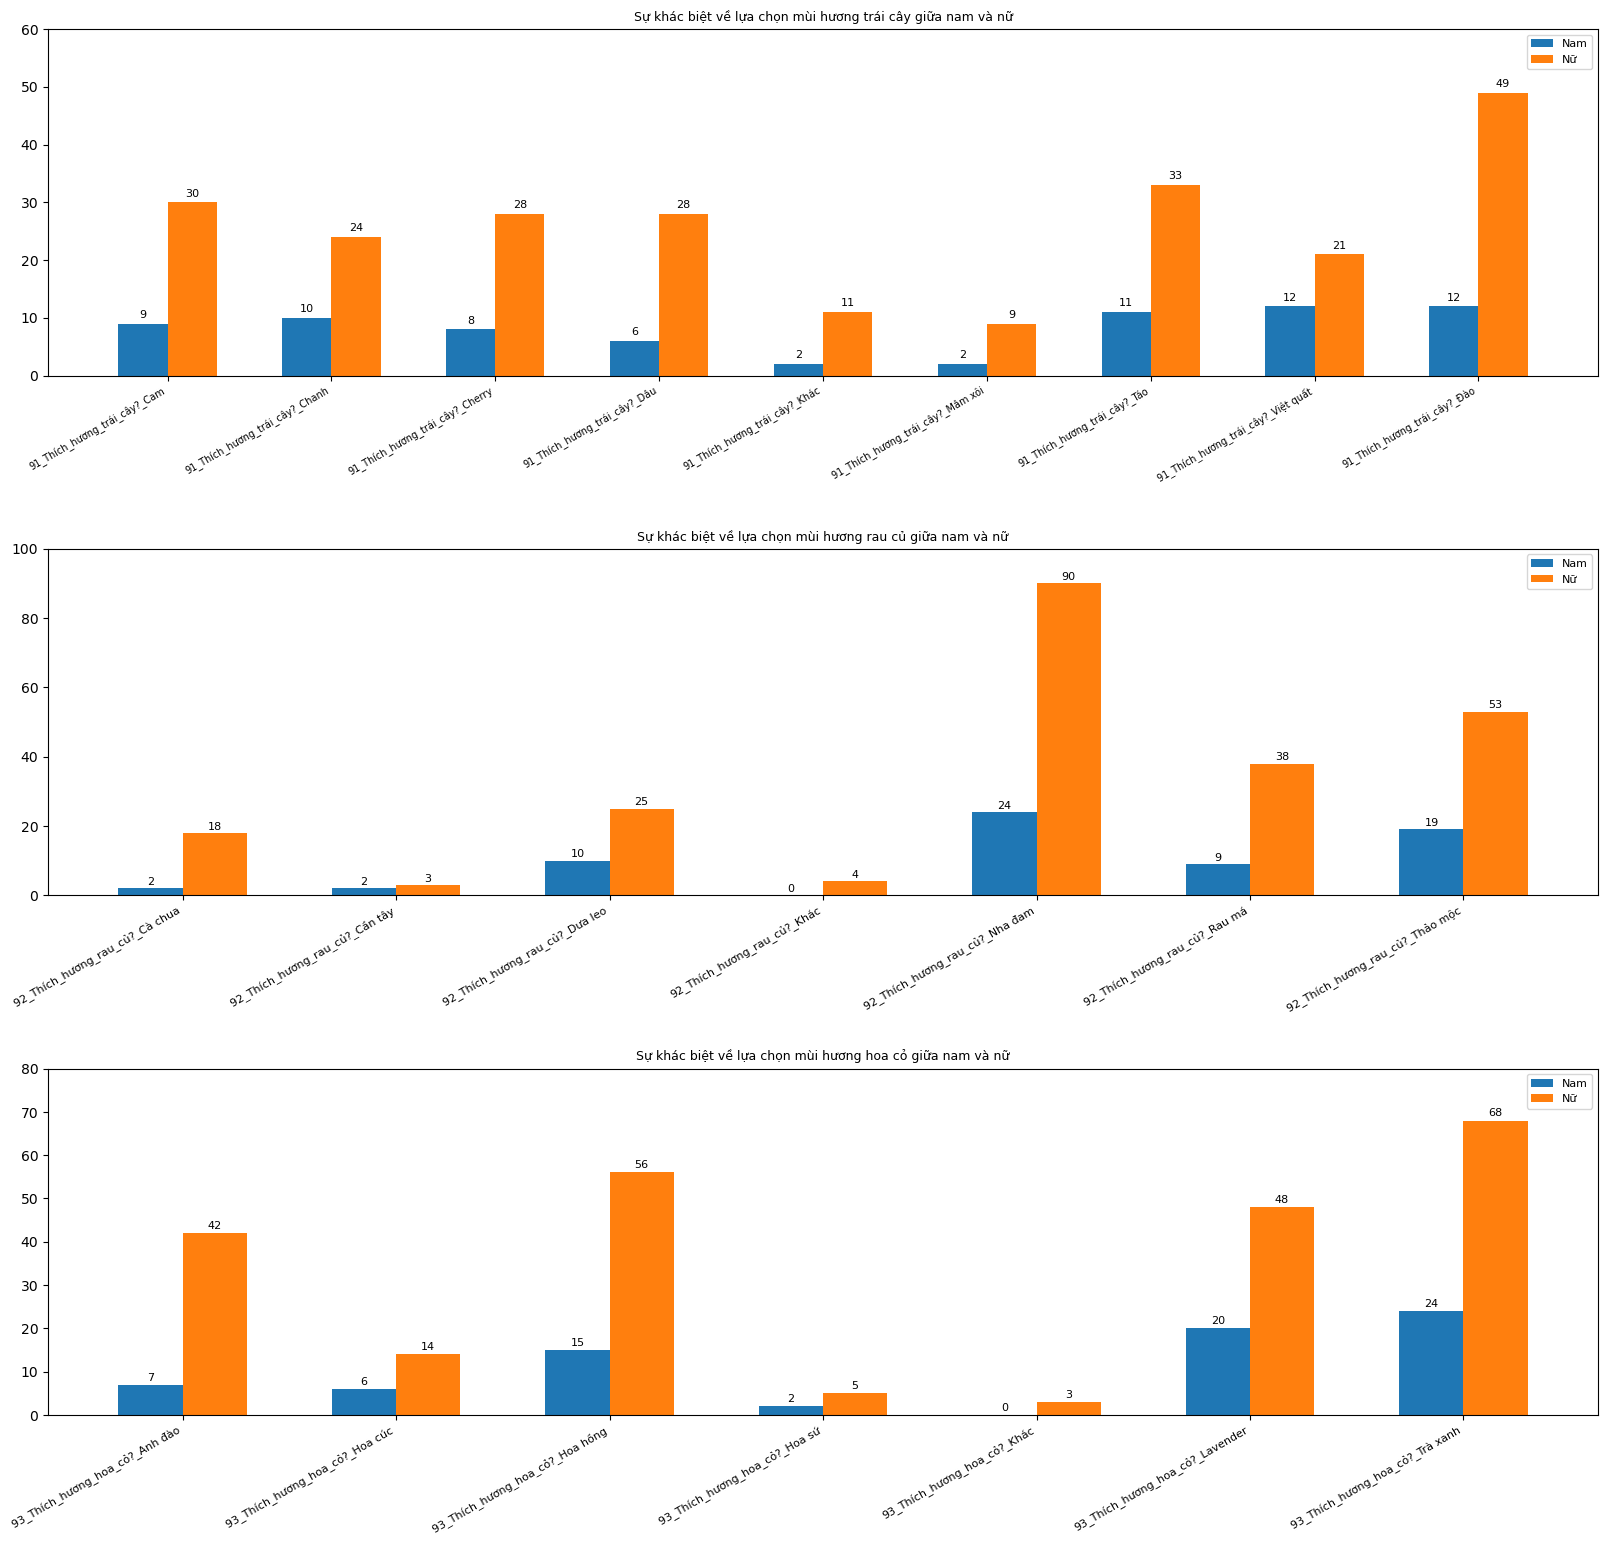

In [29]:
# TODO: Visualize 3 distribution. Your figure will look like the chart below
# raise NotImplementedError()

width = 0.3
fig, axs = plt.subplots(3,1, figsize = (20,18))
axs = axs.flatten()
# gap among figures
plt.subplots_adjust(hspace=0.5)

#distribution_91
axs[0].bar(np.arange(9) - width/2, distribution_91.iloc[0].values, width, label='Nam')
axs[0].bar(np.arange(9) + width/2, distribution_91.iloc[1].values, width, label='Nữ') 
axs[0].set_ylim([0, 60])
[axs[0].text(i + width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(distribution_91.iloc[1].values)]
[axs[0].text(i - width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(distribution_91.iloc[0].values)]
axs[0].set_xticks(np.arange(len(distribution_91.columns.values)))
axs[0].set_xticklabels(distribution_91.columns.values, rotation = 30, ha="right", fontsize = 7)
axs[0].legend(loc = 'upper right', prop = {'size':8})
axs[0].set_title('Sự khác biệt về lựa chọn mùi hương trái cây giữa nam và nữ', fontsize = 9)

#distribution_92
axs[1].bar(np.arange(7) - width/2, distribution_92.iloc[0].values, width, label='Nam')
axs[1].bar(np.arange(7) + width/2, distribution_92.iloc[1].values, width, label='Nữ')
axs[1].set_ylim([0, 100])
[axs[1].text(i + width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(distribution_92.iloc[1].values)]
[axs[1].text(i - width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(distribution_92.iloc[0].values)]
axs[1].set_xticks(np.arange(len(distribution_92.columns.values)))
axs[1].set_xticklabels(distribution_92.columns.values, rotation = 30, ha="right", fontsize = 8)
axs[1].legend(loc = 'upper right', prop = {'size':8})
axs[1].set_title('Sự khác biệt về lựa chọn mùi hương rau củ giữa nam và nữ', fontsize = 9)

# distribution_93
axs[2].bar(np.arange(7) - width/2, distribution_93.iloc[0].values, width, label='Nam')
axs[2].bar(np.arange(7) + width/2, distribution_93.iloc[1].values, width, label='Nữ')
axs[2].set_ylim([0, 80])
[axs[2].text(i + width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(distribution_93.iloc[1].values)]
[axs[2].text(i - width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(distribution_93.iloc[0].values)]
axs[2].set_xticks(np.arange(len(distribution_93.columns.values)))
axs[2].set_xticklabels(distribution_93.columns.values, rotation = 30, ha="right", fontsize = 8)
axs[2].legend(loc = 'upper right', prop = {'size':8})
axs[2].set_title('Sự khác biệt về lựa chọn mùi hương hoa cỏ giữa nam và nữ', fontsize = 9)

`COMMENT`:
- From 3 figures above, we could see that fruit `trái cây` taste, got the answers more diverse, scattering almost fairly among those options; especially for man. For women, `Đào` top the list, being the most favourite scent; for men, `Táo`, `Việt quất` and `Đào` keeps the top position.
- On the factor `rau củ`, both men and women share the favorite taste on `Nha đam` and `Thảo mộc` with high data recored in comparison with other types.
- About `hoa cỏ` factors, we could conclude that most of the favorite scent are all available in options. `Trà xanh`, `Hoa hồng` and `Lavender` are most favoured by both male and female.

### 4.1. What is the most important factor when choosing a facial cleanser between male and female participants?

- Hint: See the question #22 in `./form.pdf`.
- This question can be answered in the same way as question 1 but it is much easier because the data is single answer data.
    - Save the distribution of male and female participants to 2 dictionaries named `male_factors` and `female_factors`
    - Then visualize the result as question 1

In [30]:
# TODO: answer the question
# raise NotImplementedError()

chosen_df = survey_df.filter(regex = r'13_*')
chosen_df = pd.concat([chosen_df, survey_df['Giới_tính']], axis = 1)

chosen_df_male = chosen_df[chosen_df['Giới_tính'] == 'Nam']
chosen_df_female = chosen_df[chosen_df['Giới_tính'] == 'Nữ']

male_factors = chosen_df_male['13_Tiêu_chí_chọn_srm'].value_counts().to_dict()
female_factors = chosen_df_female['13_Tiêu_chí_chọn_srm'].value_counts().to_dict()

In [31]:
# TEST
assert male_factors == {'Thành phần': 32, 'Xuất xứ': 14, 'Giá cả': 10, 'Mùi hương': 2, 'Thể tích, dung tích': 2, 'Bao bì': 1}
assert female_factors == {'Thành phần': 161, 'Xuất xứ': 36, 'Giá cả': 34, 'Thể tích, dung tích': 7, 'Mùi hương': 5, 'Bao bì': 1}

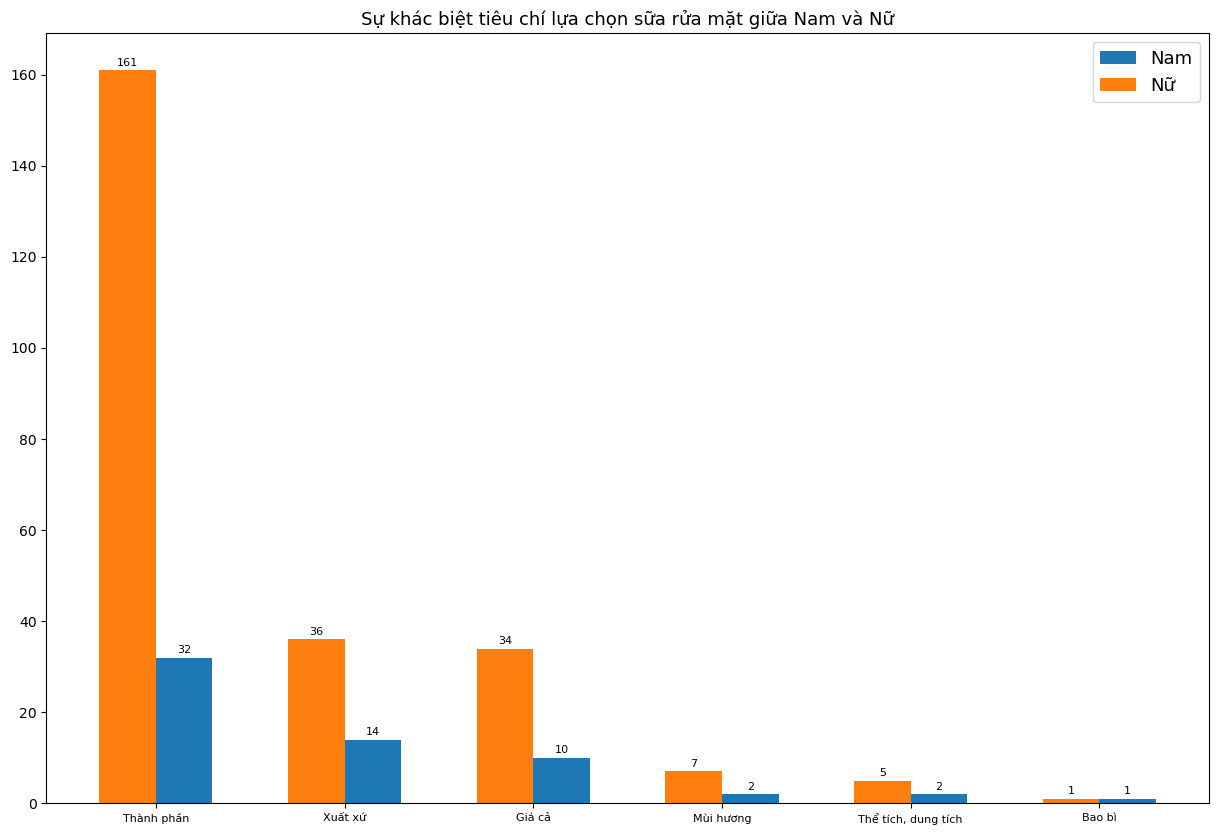

In [32]:
# TODO: Visualize
fig, ax = plt.subplots(1,1, figsize = (15,10))

width = 0.3  
x = np.arange(6) 

ax.bar(x + width/2, male_factors.values(), width, label='Nam')
ax.bar(x - width/2, female_factors.values(), width, label='Nữ')

# write value on top of each bar
[ax.text(i + width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(male_factors.values())]
[ax.text(i - width/2, v + 1, str(v), ha = 'center', fontsize = 8) for i, v in enumerate(female_factors.values())]

ax.set_xticks(np.arange(len(male_factors.keys())))
ax.set_xticklabels(male_factors.keys(), fontsize = 8)
ax.set_title('Sự khác biệt tiêu chí lựa chọn sữa rửa mặt giữa Nam và Nữ', fontsize = 13)
ax.legend(loc = 'upper right', prop = {'size':13})

`COMMENT`:
- From the figure, it is clear that the number of female participants in the survey outnumbers that of male participants.
- And both men and women pay main attention to the factor named `Thành phần` with 161 chosens from women and 32 chosens from men.
- `Bao bi` is least concerned by the youth as skin care product is concentrate on the quality first with only 1 chosen on both 2 sexes.

### 4.2. With the price that a customer is ready to pay for, what is the level of influence (score from 1 to 7) on the decision to buy a facial cleanser product ? 

- Do not use the same motif (compare male and female) for your proposed question.
- What are the purposes of answering your questions?
- Answer your question then visualize if needed.
- `PURPOSE`: The purpose of this question is to categorize the customer range (the price customer ready to pay for), and for each customers type, I will take a deeper insight into the factors on buying decision of each customer segmentation. With this strategy, we would have a better understanding in the demand of customers at different range to run the marketing campaign more effectively.

In [33]:
# TODO: answer your question here
# raise NotImplementedError()

# First, I will get the dataframe including the columns start with *21_* and the column '12_Chi_tiền_cho_150ml'

factor_df = survey_df.filter(regex = r'21_*')
factor_df = pd.concat([factor_df, survey_df['12_Chi_tiền_cho_150ml']], axis = 1)

# Now, I will take out the sub dataframe that correspond with each degree of price
factor_100_200_df = factor_df[factor_df['12_Chi_tiền_cho_150ml'] == 'Từ 100.000 vnđ - 200.000 vnđ/150 ml']
factor_200_500_df = factor_df[factor_df['12_Chi_tiền_cho_150ml'] == 'Từ 200.000 vnđ - 500.000 vnđ/ 150 ml']
factor_100_df = factor_df[factor_df['12_Chi_tiền_cho_150ml'] == 'Dưới 100.000 vnđ/150 ml']
factor_500_df = factor_df[factor_df['12_Chi_tiền_cho_150ml'] == 'Trên 500.000 vnđ/150 ml']

factor_500_df

,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương,12_Chi_tiền_cho_150ml
16,4,3,4,3,5,4,3,Trên 500.000 vnđ/150 ml
121,4,3,4,3,4,3,3,Trên 500.000 vnđ/150 ml
122,3,3,3,3,3,3,3,Trên 500.000 vnđ/150 ml
133,4,4,4,4,4,3,3,Trên 500.000 vnđ/150 ml
157,7,6,6,5,7,7,7,Trên 500.000 vnđ/150 ml
196,7,7,4,4,7,7,4,Trên 500.000 vnđ/150 ml


In [34]:
def get_mark_count(dataframe, mark):
    count_dict = {}
    for col in dataframe.columns:
        if col.startswith('21_'):
            count_dict[col] = dataframe[dataframe[col] == mark][col].count()
    return count_dict

mark_counts_100_200 = {i: get_mark_count(factor_100_200_df, i) for i in range(1, 8)}
mark_counts_200_500 = {i: get_mark_count(factor_200_500_df, i) for i in range(1, 8)}
mark_counts_100 = {i: get_mark_count(factor_100_df, i) for i in range(1, 8)}
mark_counts_500 = {i: get_mark_count(factor_500_df, i) for i in range(1, 8)}


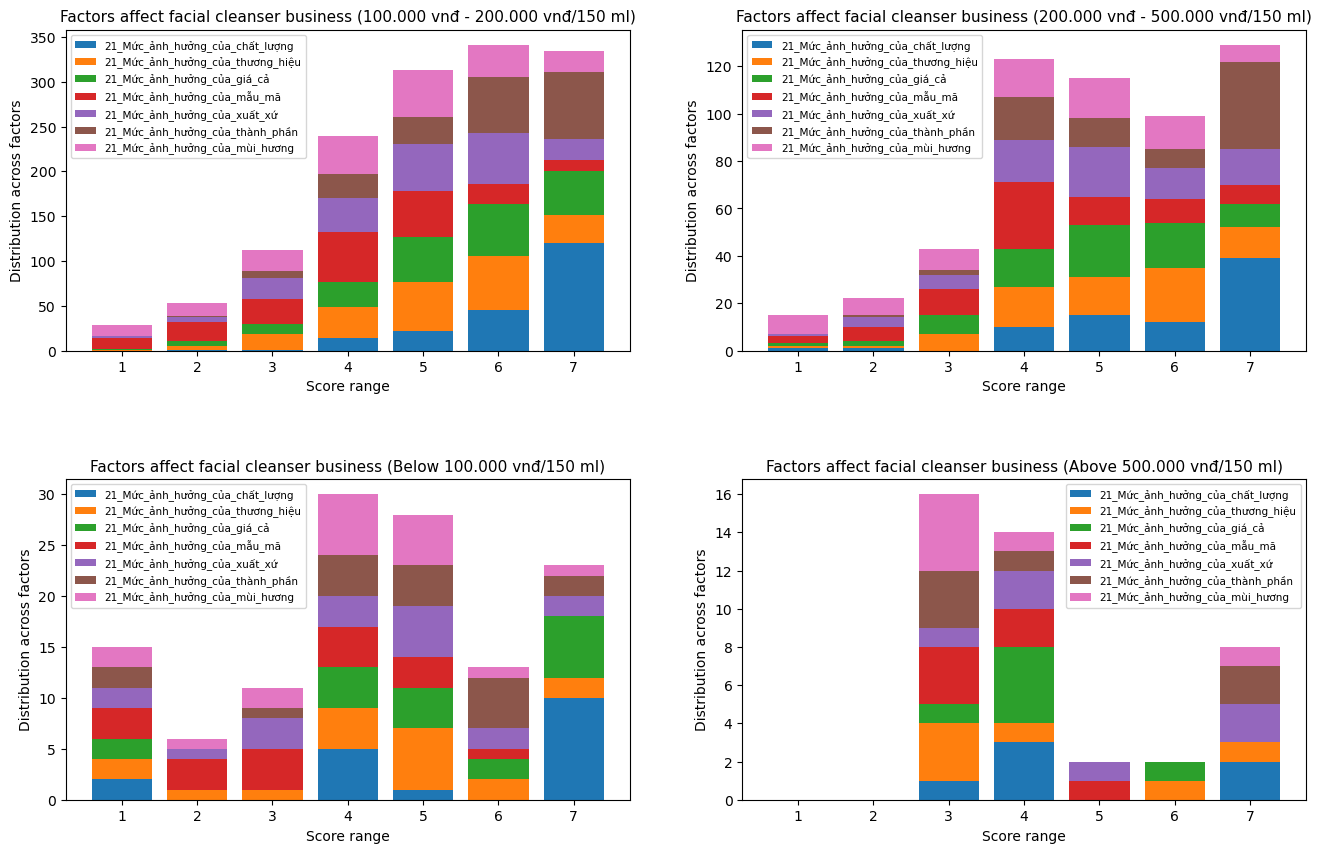

In [35]:
# TODO (OPTIONAL): visualize

def draw_stack_bar(mark_category, factor_category, mark_counts_list, ax):
    cum_size = np.zeros(len(mark_category))
    for i, cate in enumerate(factor_category):
        val = [mark_counts_list[mark][cate] for mark in mark_category]
        ax.bar(mark_category, val, label=cate, bottom=cum_size)
        cum_size += val


# get list of key from the above list
mark_category_100_200 = list(mark_counts_100_200.keys())
factor_category_100_200 = list(mark_counts_100_200[1].keys())

mark_category_200_500 = list(mark_counts_200_500.keys())
factor_category_200_500 = list(mark_counts_200_500[1].keys())

mark_category_100 = list(mark_counts_100.keys())
factor_category_100 = list(mark_counts_100[1].keys())

mark_category_500 = list(mark_counts_500.keys())
factor_category_500 = list(mark_counts_500[1].keys())

# start visualization
fig, axs = plt.subplots(2,2, figsize = (16,10))
plt.subplots_adjust(hspace = 0.4)
#axs[0, 0]
draw_stack_bar(mark_category_100_200, factor_category_100_200, mark_counts_100_200, axs[0, 0])
axs[0, 0].set_xlabel('Score range', fontsize = 10)
axs[0, 0].set_ylabel('Distribution across factors', fontsize = 10)
axs[0, 0].set_title('Factors affect facial cleanser business (100.000 vnđ - 200.000 vnđ/150 ml)', fontsize = 11)
axs[0, 0].legend(fontsize = 7.5)

#axs[0,1]
draw_stack_bar(mark_category_200_500, factor_category_200_500, mark_counts_200_500, axs[0, 1])
axs[0, 1].set_xlabel('Score range', fontsize = 10)
axs[0, 1].set_ylabel('Distribution across factors', fontsize = 10)
axs[0, 1].set_title('Factors affect facial cleanser business (200.000 vnđ - 500.000 vnđ/150 ml)', fontsize = 11)
axs[0, 1].legend(fontsize = 7.5)

#axs[1,0]
draw_stack_bar(mark_category_100, factor_category_100, mark_counts_100, axs[1, 0])
axs[1, 0].set_xlabel('Score range', fontsize = 10)
axs[1, 0].set_ylabel('Distribution across factors', fontsize = 10)
axs[1, 0].set_title('Factors affect facial cleanser business (Below 100.000 vnđ/150 ml)', fontsize = 11)
axs[1, 0].legend(fontsize = 7.5)

#axs[1, 1]
draw_stack_bar(mark_category_500, factor_category_500, mark_counts_500, axs[1, 1])
axs[1, 1].set_xlabel('Score range', fontsize = 10)
axs[1, 1].set_ylabel('Distribution across factors', fontsize = 10)
axs[1, 1].set_title('Factors affect facial cleanser business (Above 500.000 vnđ/150 ml)', fontsize = 11)
axs[1, 1].legend(fontsize = 7.5)


`COMMENT`:
- For the first customer segmentation *(ready to pay from 100.000vnd - 200.000vnd/150 ml)*, `Chất lượng`, `Thành phần` and `Giá cả` are main concerns.
- For the first customer segmentation *(ready to pay from 200.000vnd - 500.000vnd/150 ml)*, `Chất lượng` and `Thành phần` are main concerns.
- For the first customer segmentation *(ready to pay below 100.000vnd/150 ml)*, `Chất lượng` and `Giá cả` are main concerns.
- For the first customer segmentation *(ready to pay above 500.000vnd/150 ml)*, `Chất lượng`, `Thành phần` and `Xuất xứ` are main concerns.